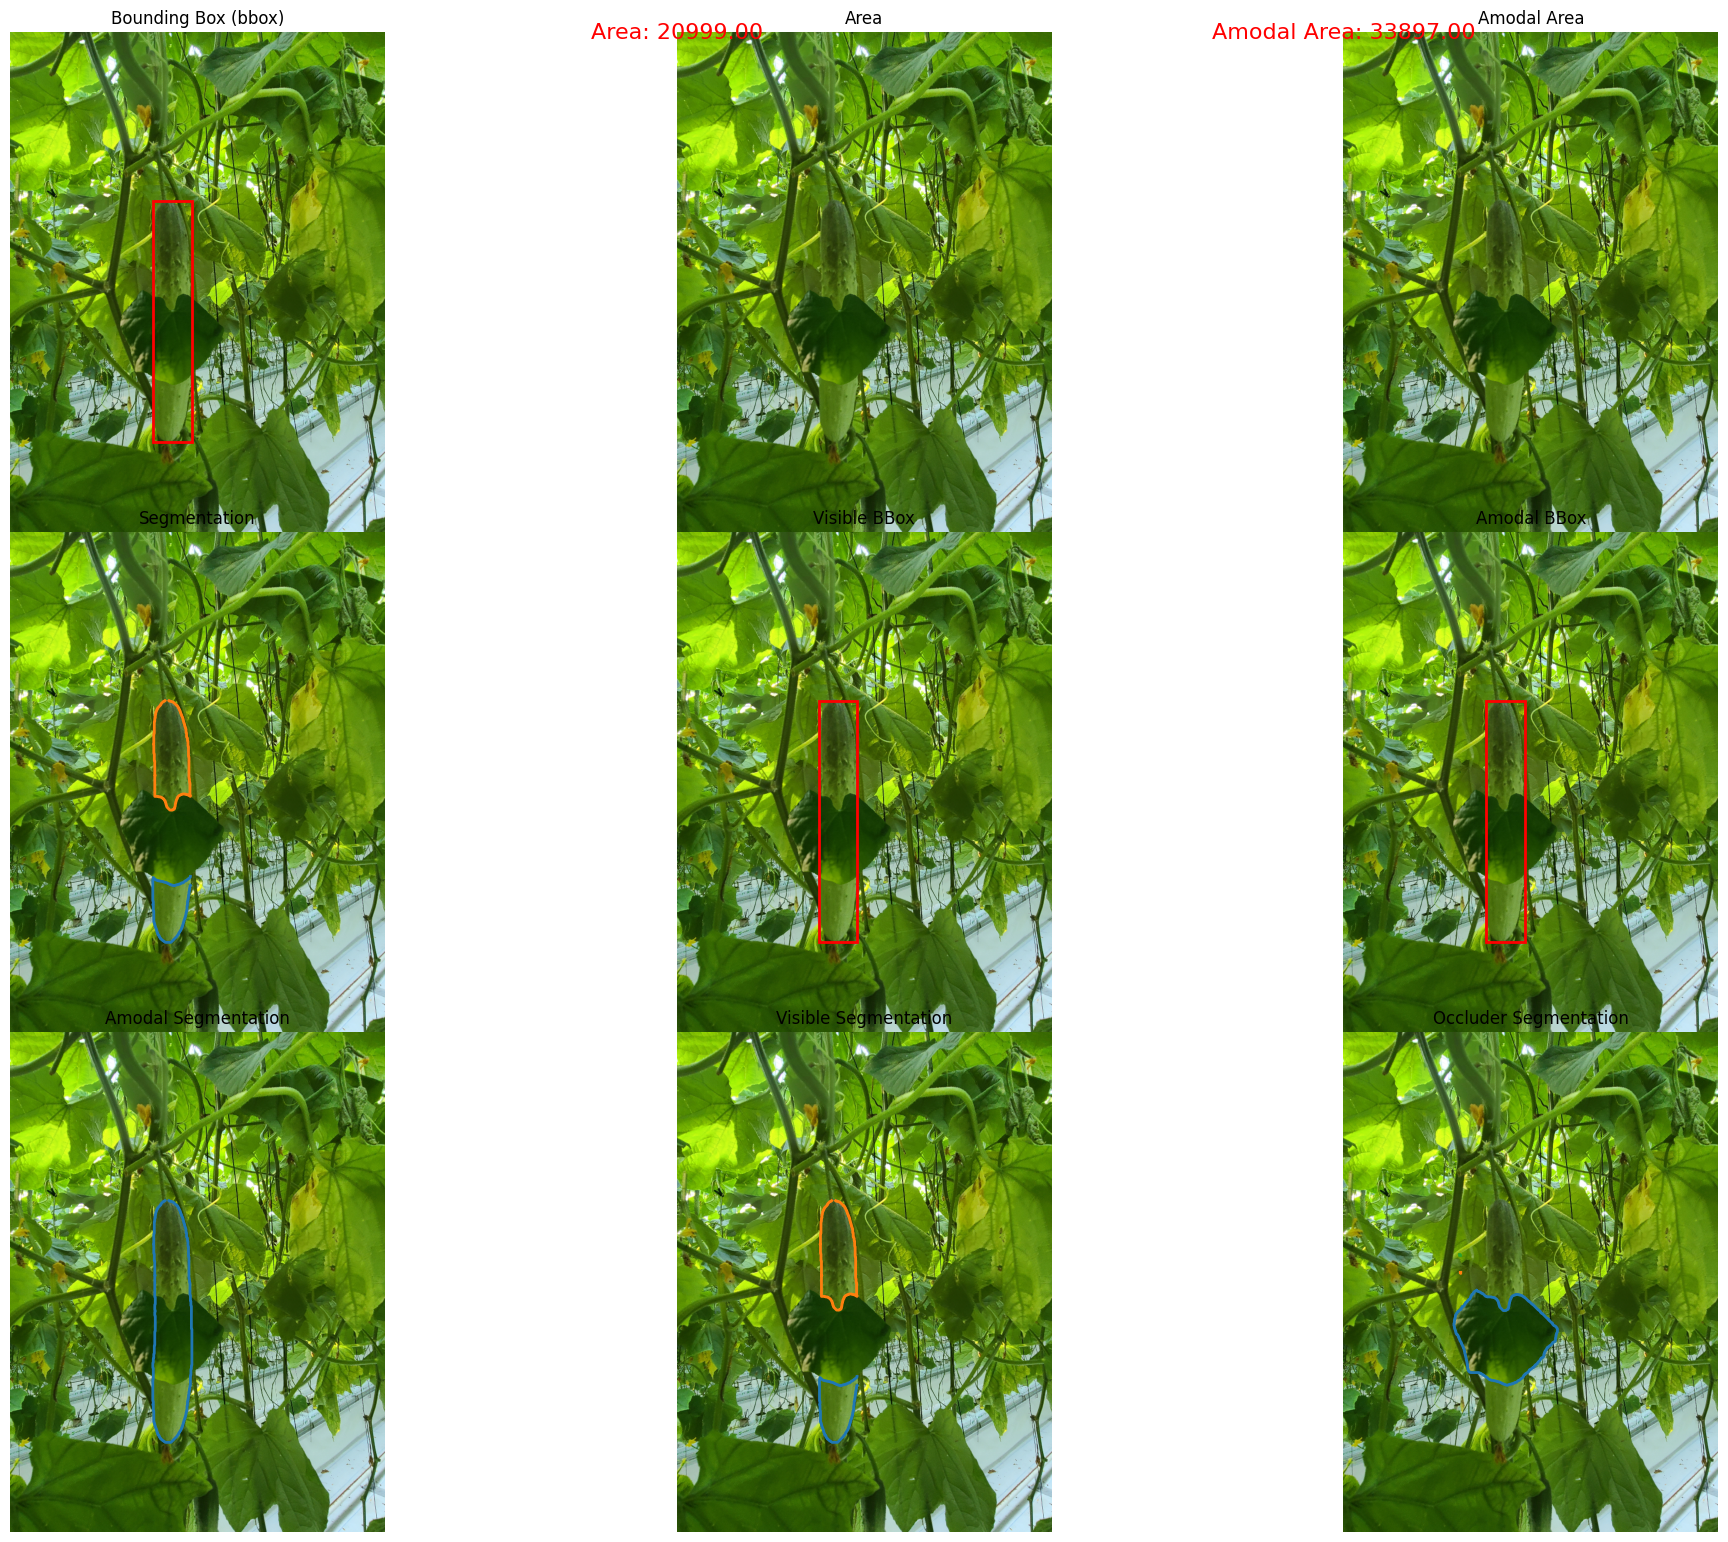

In [ ]:
import matplotlib.pyplot as plt
import cv2
import json
import numpy as np

def visualize_single_annotation(annotation, image_path):
    """
    한 개의 annotation의 다양한 요소를 플롯으로 나눠서 시각화.
    
    Args:
        annotation (dict): COCO annotation 정보.
        image_path (str): 이미지 파일 경로.
    """
    # 이미지 로드
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 플롯 설정
    fig, axs = plt.subplots(3, 3, figsize=(20, 15))
    axs = axs.ravel()

    # 각 요소별 시각화
    elements = {
        "Bounding Box (bbox)": annotation.get("bbox", []),
        "Area": annotation.get("area", 0),
        "Amodal Area": annotation.get("amodal_area", 0),
        "Segmentation": annotation.get("segmentation", []),
        "Visible BBox": annotation.get("visible_bbox", []),
        "Amodal BBox": annotation.get("amodal_bbox", []),
        "Amodal Segmentation": annotation.get("amodal_segm", []),
        "Visible Segmentation": annotation.get("visible_segm", []),
        "Occluder Segmentation": annotation.get("occluder_segm", [])
    }
    
    for i, (key, value) in enumerate(elements.items()):
        ax = axs[i]
        ax.imshow(image)
        ax.set_title(key, fontsize=12)
        
        if key in ["Area", "Amodal Area"]:
            ax.text(0.5, 0.5, f"{key}: {value:.2f}", fontsize=16, color="red", ha="center", va="center")
            ax.axis("off")
        elif "bbox" in key.lower() and value:
            # COCO bbox는 [x_min, y_min, w, h] 형식
            if len(value) == 4:
                x_min, y_min, width, height = value
                rect = plt.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor="r", facecolor="none")
                ax.add_patch(rect)
        elif "Segmentation" in key and value:
            for polygon in value:
                polygon = np.array(polygon).reshape(-1, 2)
                ax.plot(polygon[:, 0], polygon[:, 1], linewidth=2, label=key)
        ax.axis("off")
    
    # 여백 조정
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # 여백 줄이기
    plt.show()

# JSON 파일 로드
coco_json_path = "/home/knuvi/Desktop/song/cucumber-image/data/oi_seg/amodal_info7/dataset.json"
image_dir = "/home/knuvi/Desktop/song/cucumber-image/data/oi_seg/amodal_images7"

with open(coco_json_path, "r") as f:
    coco_json = json.load(f)

# 하나의 annotation 선택
selected_annotation = coco_json["annotations"][0]  # 첫 번째 annotation 선택
image_id = selected_annotation["image_id"]

# 이미지 경로 찾기
image_info = next(img for img in coco_json["images"] if img["id"] == image_id)
image_path = f"{image_dir}/{image_info['file_name']}"

# 시각화 호출
visualize_single_annotation(selected_annotation, image_path)
